# Fetch - Data Analyst Take Home

Submitted by - Sarnav Chauhan

# Data Exploration  

## 1. Are there any data quality issues present?  

The dataset consists of three primary tables – **Users, Transactions, and Products**. Each table has unique data quality challenges, with additional complexities arising when merging them. Below is a structured breakdown of key issues:  

### **A. Users Table**  

#### **Missing Data:**  
- **Birth Date**: Missing for **3.67%** of users, affecting age-related analysis.  
- **State Information**: Missing for **4.82%**, limiting geographic insights.  
- **Language Preferences**: **30.51%** of users lack recorded language data, making user segmentation difficult.  
- **Gender Information**: **5.89%** of users have missing or inconsistent values, impacting demographic analysis.  

#### **Standardization Issues:**  
- **Inconsistent gender labels**, requiring normalization (e.g., “Non-Binary” vs. “non_binary”).  

### **B. Products Table**  

#### **Missing Data:**  
- **CATEGORY_1**: **0.07%** labeled as "Needs Review," indicating possible misclassification.  
- **CATEGORY_4**: **92% missing**, making it **largely unusable** for product segmentation.  
- **Manufacturer Data**: **14.13%** of products are labeled as **"PLACEHOLDER MANUFACTURER"**, indicating missing or unclassified brands.  
- **Brand Information**: Some records contain **“BRAND NOT KNOWN”**, reducing visibility into product ownership.  

#### **Duplicate & Incomplete Entries:**  
- **185 duplicate BARCODE entries** were identified and removed.  
- **BARCODE was initially stored as float**, requiring conversion to `Int64` for consistency.  

### **C. Transactions Table**  

#### **Duplicate Records:**  
- **50% of transactions were duplicates**, requiring de-duplication.  

#### **Data Type & Formatting Issues:**  
- **FINAL_QUANTITY** contained `"zero"` values, which is **inconsistent** as quantity should always be numeric.  
- **FINAL_SALE** had blank values, requiring **imputation with 0**.  
- **Date fields (PURCHASE_DATE, SCAN_DATE)** were stored as strings and converted to `datetime` for analysis.  

### **D. Issues While Merging Tables**  

#### **Data Sparsity Issues:**  
- **Only 91 out of 17694 users (0.51%)** appear in the Transactions dataset.  
- **Only 6,562 out of 11028 products (59.5%)** are mapped to transactions, limiting purchasing pattern insights.  

#### **Low User-Transaction Match Rate:**  
- **Only 0.51% of users are linked to transactions**, making large-scale user behavior analysis difficult.  

#### **Low Product-Transaction Match Rate:**  
- **Only ~60% of products** appear in the Transactions table, indicating gaps in product coverage.  

---

## 2. Are there any fields that are challenging to understand?  

While most fields in the dataset are intuitive, the following presented challenges:  

### **A. Users Table**  
- **LANGUAGE**: The meaning of **"es-419"** versus **"en"** is unclear without documentation. It is uncertain if `es-419` represents **a regional dialect or all Spanish-speaking users**.  

### **B. Products Table**  
- **CATEGORY_4**: **92% missing data** raises questions on whether it holds meaningful information or should be removed.  
- **PLACEHOLDER MANUFACTURER**: Unclear whether this represents **missing data or a generic classification** for certain brands.  
- **BRAND NOT KNOWN**: Similar to the manufacturer issue—uncertain if this is **a data limitation or a valid classification**.  

### **C. Transactions Table**  
- **FINAL_SALE**: It is **unclear whether this represents the total sale amount or per-unit price**.  
  - **Assumption:** `FINAL_SALE` represents the **total sale value, accounting for quantity purchased**, rather than a per-unit price.  

---

## Python Code for the Analysis  

Below is the Python code used to conduct the analysis and arrive at these conclusions.  


## Data Exploration and Cleaning

We have three datasets: **Products, Users, and Transactions**.  
We will explore each file, perform necessary data cleaning, and prepare them for analysis by handling missing values, removing duplicates, and ensuring consistency across datasets.


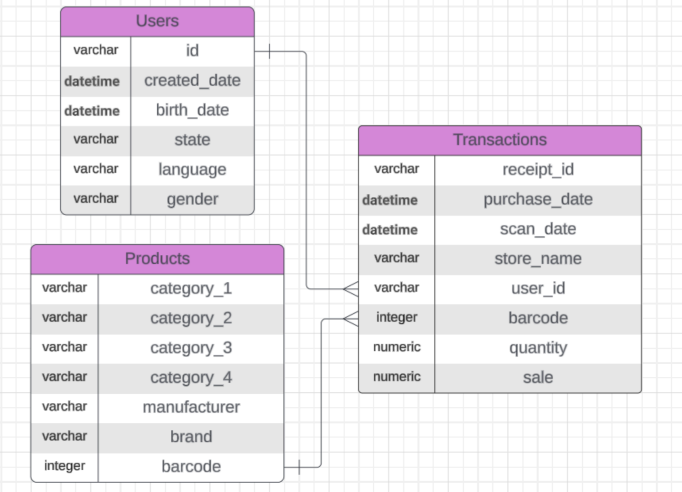

In [1]:
# Import Required Libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

## Load Datasets

We load the **Transactions, Users, and Products** datasets into Pandas DataFrames.  
These datasets contain:
- **Transactions**: Purchase records with user and product details.
- **Users**: Information about customers.
- **Products**: Details of the items being purchased.



In [2]:
transaction = pd.read_csv('TRANSACTION_TAKEHOME.csv',encoding='latin-1')
user = pd.read_csv('USER_TAKEHOME.csv',encoding='latin-1')
products = pd.read_csv('PRODUCTS_TAKEHOME.csv',encoding='latin-1')

# I. Analyzing Products Dataset

## Preview the Products Dataset

We display the first 15 rows of the **Products** dataset to understand its structure, check column names, and inspect sample values.


In [3]:
products.head(15)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
5,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,BEAUHAIR,6.626585e+11
6,Health & Wellness,Medicines & Treatments,Vitamins & Herbal Supplements,NaN,HALEON,EMERGEN-C,6.177376e+11
7,Health & Wellness,Deodorant & Antiperspirant,Men's Deodorant & Antiperspirant,NaN,NaN,NaN,7.501839e+12
8,Snacks,Snack Bars,Granola Bars,NaN,HYVEE INC,HY-VEE,7.545013e+10
9,Health & Wellness,NaN,NaN,NaN,CHURCH & DWIGHT,REPHRESH,NaN


## Check Data Types

We inspect the data types of all columns in the **Products** dataset to ensure correctness.  
This helps identify columns that may need type conversions (e.g., changing object/string columns to numeric types).


In [4]:
products.dtypes

CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

## Convert BARCODE to Integer Format

The `BARCODE` column is currently stored as a float.  
We convert it to `Int64` as mentioned in Entity Relationship Model

In [5]:
products['BARCODE'] = products['BARCODE'].astype('Int64')

## Convert Category_ columns to Category Format


In [6]:
#CATEGORY_1,CATEGORY_2,CATEGORY_3 all have object data type, need to convert to category data type
for col in ["CATEGORY_1", "CATEGORY_2", "CATEGORY_3","CATEGORY_4"]:
    products[col] = products[col].astype("category")

## Check for Missing Values

We analyze the **Products** dataset for missing values in each column.  
This helps identify columns that may require data imputation or further cleaning.


In [7]:
products.isnull().sum()

CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

## Check Unique Values in Each Column

We count the number of unique values in each column of the **Products** dataset.  
This helps identify categorical columns, detect potential duplicates, and understand the variability in the data.


In [8]:
products.nunique()

CATEGORY_1          27
CATEGORY_2         121
CATEGORY_3         344
CATEGORY_4         127
MANUFACTURER      4354
BRAND             8122
BARCODE         841342
dtype: int64

## Check Dataset Dimensions

We retrieve the number of rows and columns in the **Products** dataset.  
This helps us understand the dataset size and assess if any filtering or transformations are needed.


In [9]:
products.shape

(845552, 7)

## Remove Rows with Missing BARCODE Values

Since `BARCODE` is a critical identifier, we remove rows where it is missing.  
We then check the dataset's dimensions to confirm the number of rows dropped.


In [10]:
# Remove rows where BARCODE is null
products = products[~products['BARCODE'].isnull()]

# Check the new dataset dimensions after filtering
products.shape  # 4025 rows were removed (845,552 - 841,527)


(841527, 7)

## Check for Duplicate BARCODE Entries

Since `BARCODE` is expected to be a unique identifier for products,  
we check if there are any duplicate values in this column.  
If duplicates exist, we may need to investigate and handle them appropriately.


In [11]:
#checking if any duplicated records
products["BARCODE"].duplicated().sum()

185

## Remove Duplicate BARCODE Entries

Since `BARCODE` should be unique for each product, we remove duplicate records  
to ensure data integrity and prevent redundant entries.


In [12]:
# Remove duplicate rows based on BARCODE and keep only the first occurrence
products = products.drop_duplicates(subset=["BARCODE"])


## Validate Duplicate Removal

We recheck the dataset dimensions to confirm that duplicate `BARCODE` values have been removed successfully.


In [13]:
# Capture the original number of rows before removing duplicates
products.shape

(841342, 7)

## Check Dataset Structure

We display summary information about the **Products** dataset, including:  
- The number of non-null values per column  
- Data types of each column  

This helps ensure data integrity and identify any columns needing further cleaning.


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841342 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CATEGORY_1    841231 non-null  category
 1   CATEGORY_2    840681 non-null  category
 2   CATEGORY_3    782629 non-null  category
 3   CATEGORY_4    67232 non-null   category
 4   MANUFACTURER  615125 non-null  object  
 5   BRAND         615127 non-null  object  
 6   BARCODE       841342 non-null  Int64   
dtypes: Int64(1), category(4), object(2)
memory usage: 31.3+ MB


Looks like a CATEGORY_4 has a lot of null values. To explore it further, I am looking at percentages

## Percentage of Missing Values in Products Dataset

Now we calculate the **percentage of missing values** in each column using `.isnull().mean()`.  
This method provides a clearer understanding of data quality issues by showing how much data is missing in each column.


In [15]:
# Calculate the percentage of missing values for each column using .mean()
products.isnull().mean() * 100

CATEGORY_1       0.013193
CATEGORY_2       0.078565
CATEGORY_3       6.978494
CATEGORY_4      92.008957
MANUFACTURER    26.887639
BRAND           26.887401
BARCODE          0.000000
dtype: float64

### Insight: High Missing Values in CATEGORY_4

- CATEGORY_4 has 92.01% missing values, making it largely incomplete.  
- If we were building a machine learning model, this column would likely be removed due to the high proportion of missing data.  
- However, since our focus is on data analysis, we will retain CATEGORY_4 for now to explore any potential patterns or insights it may provide.


## Analyze Product Category Distribution

We check the distribution of **CATEGORY_1** to understand how products are grouped.  
This helps identify the most and least common categories, which may be useful for further analysis.


In [16]:
products["CATEGORY_1"].value_counts()

Health & Wellness         510382
Snacks                    323018
Beverages                   3977
Pantry                       867
Apparel & Accessories        840
Dairy                        592
Needs Review                 547
Alcohol                      475
Home & Garden                115
Deli & Bakery                 66
Frozen                        62
Meat & Seafood                49
Sporting Goods                47
Office & School               45
Restaurant                    35
Toys & Games                  28
Household Supplies            24
Produce                       20
Animals & Pet Supplies        16
Arts & Entertainment           7
Electronics                    5
Mature                         3
Baby & Toddler                 3
Vehicles & Parts               3
Media                          2
Beauty                         2
Luggage & Bags                 1
Name: CATEGORY_1, dtype: int64

### Understanding "Needs Review" in CATEGORY_1

The **"Needs Review"** category may not be a real product category. It could be a placeholder for products that need manual review or were not assigned a proper category.  


### *Ask:*
- "Needs Review" likely means these products need further classification.
    
- It might not be an actual category but a label for uncategorized items.  


We may need to check product details or consult with business leaders to confirm this.


## Calculate Category Distribution

Now, to understand the dominance of **Health & Wellness** and **Snacks** in the dataset,  
we calculate their percentage share in `CATEGORY_1`.

- First, we determine the total number of products.
- Then, we compute the percentage of products that belong to these two major categories.
- Finally, we print the results to quantify their contribution to the dataset.


In [17]:
# Total number of products
total_products = products["CATEGORY_1"].count()

# Calculate percentage for top 2 categories
health_wellness_pct = (products["CATEGORY_1"].value_counts().get("Health & Wellness", 0) / total_products) * 100
snacks_pct = (products["CATEGORY_1"].value_counts().get("Snacks", 0) / total_products) * 100

# Print results
print(f"Health & Wellness: {health_wellness_pct:.2f}%")
print(f"Snacks: {snacks_pct:.2f}%")


Health & Wellness: 60.67%
Snacks: 38.40%


### Insight: Dominance of Health & Wellness and Snacks Categories

The majority of products in `CATEGORY_1` belong to **Health & Wellness** and **Snacks** categories.  

- **Health & Wellness** accounts for **61%** of the total data.  
- **Snacks** makes up **38%** of the dataset.  

Together, these two categories form a significant portion of the dataset **~99%** , indicating that most products fall under these segments.


## Top 20 Subcategories in CATEGORY_2

We identify the **top 20 most common subcategories** in `CATEGORY_2` based on product count.  
This helps us understand how products are distributed within each major category.


In [18]:
products["CATEGORY_2"].value_counts().head(20)

Candy                                       120620
Hair Care                                   111167
Medicines & Treatments                       98734
Bath & Body                                  81131
Skin Care                                    62182
Nuts & Seeds                                 33475
Cookies                                      30383
Eye Care                                     24971
Chips                                        23585
Oral Care                                    22418
First Aid                                    19325
Topical Muscle & Joint Relief Treatments     18569
Snack Bars                                   18343
Medical Supplies & Equipment                 16792
Dips & Salsa                                 16170
Hair Removal                                 13486
Fruit & Vegetable Snacks                     13329
Puffed Snacks                                12521
Crackers                                     11329
Snack Cakes                    

## Calculate Percentage Distribution of CATEGORY_2

To understand the proportion of products in each subcategory of `CATEGORY_2`, we:  
 **Compute the percentage** of each unique subcategory by normalizing `value_counts()`.  

This will help us analyze which subcategories have the highest representation in the dataset.


In [19]:
# Calculate the percentage of each CATEGORY_2
category_2_percentage = (products["CATEGORY_2"].value_counts(normalize=True) * 100).round(2)

# Convert to DataFrame for better display
category_2_percentage_df = category_2_percentage.reset_index()
category_2_percentage_df.columns = ["CATEGORY_2", "Percentage"]
category_2_percentage_df


,CATEGORY_2,Percentage
0,Candy,14.35
1,Hair Care,13.22
2,Medicines & Treatments,11.74
3,Bath & Body,9.65
4,Skin Care,7.40
...,...,...
116,Ice,0.00
117,Pasta & Noodles,0.00
118,Party & Celebration,0.00
119,Luggage Accessories,0.00


### Top 5 CATEGORY_2 Subcategories

Below are the **top 5 most common subcategories** in `CATEGORY_2` based on percentage share.  
1. Candy
2. Hair Care
3. Medicines & Treatments
4. Bath & Body
5. Skin Care

These subcategories represent the largest portion of the dataset and are crucial for further analysis.


## Calculate Percentage Distribution of CATEGORY_3

Performing same analysis for CATEGORY_3

In [20]:
products["CATEGORY_3"].value_counts().head(20)

Confection Candy                           56911
Vitamins & Herbal Supplements              55632
Chocolate Candy                            47553
Hair Styling Products                      20406
Reading Glasses                            20392
Hand & Body Lotions                        18729
Shampoo                                    17671
Conditioner                                17133
Hair Care Accessories                      16748
Braces & Wraps                             15200
Body Wash                                  15004
Hair Color                                 14411
Liquid Hand Soap                           12469
Potato Chips                               11168
Lip Balms & Treatments                     11042
Popcorn                                    10219
Facial Lotion & Moisturizer                 9871
Hazelnuts                                   9699
Digestive Health Medicines & Treatments     9550
Bar Soap                                    8809
Name: CATEGORY_3, dt

Checking the percentage of categories for CATEGORY_3

In [21]:
# Calculate the percentage of each CATEGORY_2
category_3_percentage = (products["CATEGORY_3"].value_counts(normalize=True) * 100).round(2)

# Convert to DataFrame for better display
category_3_percentage_df = category_3_percentage.reset_index()
category_3_percentage_df.columns = ["CATEGORY_3", "Percentage"]
category_3_percentage_df


,CATEGORY_3,Percentage
0,Confection Candy,7.27
1,Vitamins & Herbal Supplements,7.11
2,Chocolate Candy,6.08
3,Hair Styling Products,2.61
4,Reading Glasses,2.61
...,...,...
339,Sunglasses,0.00
340,Dessert Dips,0.00
341,Snacks & Sides,0.00
342,Slushies & Icees,0.00


### Dominance of "Confection Candy" in CATEGORY_3

The majority of products in `CATEGORY_3` belong to the **"Confection Candy"** subcategory.  
This indicates that confectionery and candy items form a significant portion of the dataset.  


## Performing same analysis for CATEGORY_4

In [22]:
products["CATEGORY_4"].value_counts().head(20)

Lip Balms                                          9712
Already Popped Popcorn                             6956
Sleep Aids                                         4968
Hair Brushes & Combs                               4720
Women's Shaving Gel & Cream                        3871
Men's Razors                                       2833
Heartburn & Antacids Medicines & Treatments        2747
Constipation Relief Medicines & Treatments         2733
Immune Support                                     2675
Microwave Popcorn                                  2308
Women's Razors                                     2291
Cough & Chest Congestion Medicines & Treatments    2204
Hair Straighteners                                 2035
Gas Relief Medicines & Treatments                  1742
Regular Cola                                       1552
Cold & Flu Medicines & Treatments                  1405
Medicated Lip Treatments                           1318
Skin Toners                                     

In [23]:
# Calculate the percentage of each CATEGORY_4
category_4_percentage = (products["CATEGORY_4"].value_counts(normalize=True) * 100).round(2)

# Convert to DataFrame for better display
category_4_percentage_df = category_4_percentage.reset_index()
category_4_percentage_df.columns = ["CATEGORY_4", "Percentage"]
category_4_percentage_df


,CATEGORY_4,Percentage
0,Lip Balms,14.45
1,Already Popped Popcorn,10.35
2,Sleep Aids,7.39
3,Hair Brushes & Combs,7.02
4,Women's Shaving Gel & Cream,5.76
...,...,...
122,Chili Sauce,0.00
123,Coconut Milk,0.00
124,Ramen & Instant Noodles,0.00
125,Salt & Pepper Shakers,0.00


### Dominance of "Lip Balms" in CATEGORY_4

The majority of products in `CATEGORY_4` belong to the **"Lip Balms"** subcategory.  


## Percentage Distribution of MANUFACTURER

We calculate the **percentage share** of each unique manufacturer in the dataset.  
This helps identify the most common manufacturers and understand how product distribution is spread across different brands.  

- The results will show the proportion of products associated with each manufacturer.
- This can help in analyzing brand dominance and potential gaps in manufacturer representation.


In [24]:
products["MANUFACTURER"].value_counts(normalize=True) * 100

PLACEHOLDER MANUFACTURER             14.126397
REM MANUFACTURER                      3.383540
PROCTER & GAMBLE                      3.380939
L'OREAL                               2.710506
UNILEVER                              2.707580
                                       ...    
STILES APIARIES, LLC                  0.000163
LV1 GROUP                             0.000163
KOHL'S                                0.000163
BARNACLE FOODS                        0.000163
OUTDOOR PRODUCT INNOVATIONS, INC.     0.000163
Name: MANUFACTURER, Length: 4354, dtype: float64

### Insight: Manufacturer Distribution

- **"PLACEHOLDER MANUFACTURER" (14.13%)** is the most frequent, suggesting missing or generic manufacturer labels.  

### *Ask:* "PLACEHOLDER MANUFACTURER" May Need Clarification  

- It is unclear whether **"PLACEHOLDER MANUFACTURER"** represents an actual manufacturer or is used as a generic label for missing data.  
- If it is a placeholder, further information is needed to correctly categorize these products.  
- Verifying this can help improve data accuracy and ensure proper manufacturer mapping.


### Performing similar analysis on "BRAND"

In [25]:
products["BRAND"].value_counts(normalize=True) * 100

REM BRAND          3.383529
BRAND NOT KNOWN    2.767233
PRIVATE LABEL      2.188816
CVS                1.040436
SEGO               0.785366
                     ...   
HERLOCHERS         0.000163
FEBFOXS            0.000163
S.O.S              0.000163
AFTERBURN          0.000163
GATEWAY            0.000163
Name: BRAND, Length: 8053, dtype: float64

### Insight: Brand Distribution

- **"REM BRAND" (3.38%)** is the most common known brand in the dataset.  
- **"BRAND NOT KNOWN" (2.77%)** indicates missing or unspecified brand information, which may need further clarification.  
- **"PRIVATE LABEL" (2.19%)** suggests a significant presence of store-brand or non-major brands.  
- **CVS (1.04%) and SEGO (0.79%)** are among the top recognized brands.  

We might need more data for products with unknown brands ("BRAND NOT KNOWN)

## Export Cleaned Products Data  

We save the cleaned and processed **Products** dataset as a CSV file for further analysis or sharing.  
The file is stored without the index to keep the output clean and structured.  


In [26]:
products.to_csv("C:\\Users\\sana7\\Downloads\\products_df.csv",index=False)

# II. Analyzing the Users Dataset  

We now begin exploring the **Users** dataset to understand customer-related information.  


In [27]:
user.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


## Checking Data Types in the Users Table  

We inspect the data types of each column in the **Users** dataset to:  
- Ensure numerical, categorical, and date fields are correctly formatted.  
- Identify any necessary type conversions for better analysis.  



In [28]:
user.dtypes

ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

## Converting Date Columns to Datetime Format  

We convert **BIRTH_DATE** and **CREATED_DATE** to `datetime` format to ensure proper date-based analysis.  


In [29]:
user['BIRTH_DATE'] = pd.to_datetime(user['BIRTH_DATE'])
user['CREATED_DATE'] = pd.to_datetime(user['CREATED_DATE'])


## Checking for Duplicate Records in Users Table  

We check for **duplicate rows** in the Users dataset to ensure data integrity.  

In [30]:
user.duplicated().sum()

0

The analysis shows that there are **no duplicate records** in the Users dataset.  

- This confirms that each user entry is unique.  
- No data cleaning is required for duplicate removal.  
- We can proceed with further analysis without concerns about redundancy.  

## Verifying Duplicates at the ID Level  

We check for duplicate values in the **ID** column, assuming it is the **primary key** for the Users table.  

### **Assumption:**  
- Each user should have a **unique ID** since it serves as the primary identifier.  
- If duplicates exist, it may indicate **data integrity issues** that need further investigation.  



In [31]:
user["ID"].duplicated().sum()

0

This validation ensures that the Users dataset maintains uniqueness at the ID level.  


## Checking Users Table Structure  

We use `.info()` to examine the structure of the **Users** dataset, including:  

- The total number of entries (rows) and columns.  
- Data types of each column (e.g., integers, strings, datetime).  
- Count of **non-null values** to identify missing data.  

This step ensures that the data is properly formatted before further analysis.  


In [32]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


## Insights from Users Table Structure  

- The **ID** and **CREATED_DATE** columns have **100% non-null values**, confirming that all users have unique IDs and creation dates.  
- **BIRTH_DATE** is missing for **3.67%** of users, which might impact **age-related analysis**.  
- **STATE** is missing for **4.82%** of users, suggesting incomplete location data.  
- **LANGUAGE** has the highest missing values (**30.51%**), indicating that user language preference may not always be recorded.  
- **GENDER** is missing for **5.89%** of users, which may limit demographic analysis.  

## Language Distribution in Users Table  

We analyze the **LANGUAGE** column to understand the distribution of user language preferences.  

In [33]:
user["LANGUAGE"].value_counts()

en        63403
es-419     6089
Name: LANGUAGE, dtype: int64

### Insight: Language Distribution in Users Table  
  
- The dataset is primarily **English-speaking** *(~91.4% of those with a recorded language), with a small but notable **Spanish-speaking** user base(~8.6%).  
- A large portion of users (**30.51%**) have **no recorded language**, indicating missing data.  
- Missing language data could make it harder to **target users based on their language** or **offer personalized experiences** in their preferred language.  


## Gender Distribution in Users Table  

We will now check the most common gender entries in the dataset.


In [34]:
user["GENDER"].value_counts()

female                    64240
male                      25829
transgender                1772
prefer_not_to_say          1350
non_binary                  473
unknown                     196
not_listed                  180
Non-Binary                   34
not_specified                28
My gender isn't listed        5
Prefer not to say             1
Name: GENDER, dtype: int64

## Insight: Gender Distribution in Users Table  

- **Female (64,240) and Male (25,829)** are the most common gender entries.  
- **There are multiple variations of similar gender categories**, such as **"non_binary" vs. "Non-Binary"**, and **"prefer_not_to_say" vs. "Prefer not to say"**.  
- **We will standardize gender labels** using `.replace()` to ensure consistency in the dataset.  

### **Next Steps:**  
- Merge similar categories to reduce redundancy.  
- Ensure gender values are correctly grouped for accurate analysis.  


In [35]:
gender_replace_map = {
    'female': 'Female',
    'male': 'Male',
    'transgender': 'Transgender',
    'prefer_not_to_say': 'Prefer not to say',
    'prefer not to say': 'Prefer not to say',
    'non_binary': 'Non-binary',
    'Non-Binary': 'Non-binary',  
    'unknown': 'Unknown',
    'not_listed': 'Not listed',
    "my gender isn't listed": 'Not listed',
    'not_specified': 'Unknown',
    'My gender isn\'t listed' : 'Not listed'
}

user['GENDER'] = user['GENDER'].replace(gender_replace_map)

## Verifying Gender Distribution After Standardization  

After replacing duplicate categories, we check the **updated gender distribution** to ensure that:  
- Similar categories have been correctly merged.  
- The number of records remains the same.  

This step will help confirm that gender data is properly structured before further insights.  


In [36]:
user["GENDER"].value_counts()

Female               64240
Male                 25829
Transgender           1772
Prefer not to say     1351
Non-binary             507
Unknown                224
Not listed             185
Name: GENDER, dtype: int64

## Visualizing Gender Distribution with a Pie Chart  

In [39]:
# Create a pie chart using Plotly
fig = px.pie(
    user, 
    names="GENDER", 
    title="Gender Distribution of Users", 
    hole=0.3, 
    color_discrete_sequence=px.colors.qualitative.Set2,  
)


fig.show()


### Insight: Gender Distribution  

- **Females (64%)** make up the majority of users, followed by **Males (26%)**.  
- Together, **Females and Males account for the largest share of users** in the dataset.  
- Other gender categories, including **Transgender, Non-binary, and Prefer not to say**, form a smaller percentage.  
- This distribution highlights that most users identify as either **Female or Male**, which could be important for demographic-based analysis.  


## Checking User Distribution by State  

We analyze the number of users from each state to understand geographical distribution.  


In [40]:
user["STATE"].value_counts().iloc[:10]

TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
Name: STATE, dtype: int64

## Percentage of Users by State  

We calculate the **percentage of users in each state** to understand the geographical distribution of users.  

- This helps identify which states have the highest user concentration.  
- The results can be useful for **regional analysis, targeted marketing, and business expansion strategies**.  
- The data is converted into percentages for easier comparison.  

We will now display the percentage of users across different states.  


In [43]:
# Calculate the percentage of users in each state
state_percentage = (user["STATE"].value_counts(normalize=True) * 100).round(2)

state_percentage_df = state_percentage.reset_index()
state_percentage_df.columns = ["STATE", "Percentage"]
state_percentage_df.head(10)

,STATE,Percentage
0,TX,9.48
1,FL,9.37
2,CA,9.02
3,NY,5.99
4,IL,3.99
5,GA,3.91
6,PA,3.83
7,OH,3.70
8,NC,3.57
9,NJ,3.05


## Plotting the percentanges on US Map

In [44]:
import plotly.graph_objects as go

# Create the choropleth map
fig = px.choropleth(
    state_percentage_df,
    locations="STATE",
    locationmode="USA-states",
    color="Percentage",
    color_continuous_scale="greens",
    title="User Distribution by State (%)",
    scope="usa",
    labels={"Percentage": "User %"}
)

# To add state labels 
fig.add_trace(
    go.Scattergeo(
        locations=state_percentage_df["STATE"],
        locationmode="USA-states",
        text=state_percentage_df["STATE"] + "<br>" + state_percentage_df["Percentage"].astype(str) + "%",
        mode="text",
        textfont=dict(size=10, color="black") 
    )
)

# Show the map
fig.show()


### Insight: High User Concentration in Texas, Florida, and California  

- **Texas, Florida, and California** have the **highest user concentration** in the dataset.  
- These states are among the most populous in the U.S., which may explain their dominance in user distribution.  
- The high user count in these states could be valuable for **targeted marketing, regional trends analysis, and business expansion strategies**.  

## Exporting the Cleaned Users Data  

We save the **Users** dataset as a CSV file after cleaning and processing.  


In [45]:
user.to_csv("C:\\Users\\sana7\\Downloads\\user_df.csv",index=False)

# III. Analyzing the Transactions Dataset  

We now begin analyzing the **Transactions** dataset to understand user purchase behavior.  

### **Key Objectives:**  
- Examine the dataset structure and key attributes.  
- Identify **missing values, duplicates, and data inconsistencies**.  

This analysis will help in understanding **how users interact with the platform and make purchases**.  


## Previewing the Transactions Dataset  

We display the **first few rows** of the Transactions dataset to:  

- Understand the structure and column names.  
- Get an overview of the type of data available.  
- Identify any potential **data quality issues** such as missing values or inconsistencies.  

This helps set the stage for deeper analysis.  


In [46]:
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


### Data Issues in Transactions  

- **BARCODE has null values**, requiring imputation.  
- **FINAL_QUANTITY contains zeros**, which is inconsistent as quantity should be numeric.  
- **FINAL_SALE has blank values**, which should be replaced with `0` for consistency.  

We will clean and impute these issues before analysis.  


## Checking the Structure of the Transactions Dataset  

We use `.info()` to examine the dataset's structure, including:  

- The total number of rows and columns.  
- Data types of each column (e.g., integers, floats, objects, datetime).  
- Count of **non-null values** to identify missing data.  


In [47]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB



- The dataset contains **50,000 total records**, but only **44,238 non-null values** in BARCODE  
- This means that **5,762 records have missing values** for BARCODE, which may impact analysis.  

## Cleaning Data and Imputing Missing Values  

- **Null BARCODE values** → Imputed with `-999999`.  
- **Zero FINAL_QUANTITY values** → Replaced with `0`.  
- **Blank FINAL_SALE values** → Imputed with `0`.  

This ensures consistency and prevents issues in analysis.  


In [48]:
transaction["BARCODE"] = transaction["BARCODE"].replace(pd.NA, -999999)
transaction["BARCODE"] = transaction["BARCODE"].fillna(-999999)

transaction["FINAL_QUANTITY"]=transaction["FINAL_QUANTITY"].replace("zero",0)
transaction["FINAL_SALE"] = transaction["FINAL_SALE"].replace(
    r'^\s*$',  # Regex pattern to find whitespace
    0,    # Replace with 0
    regex=True
)


In [49]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         50000 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


## Correcting data types 

As per the **Entity Relationship Diagram (ERD)**:
- The **BARCODE** column should be stored as an integer.  
- The **FINAL_SALE** column should be stored as an numeric.  
- The **FINAL_QUANTITY** column should be stored as an numeric.  


In [50]:
transaction["BARCODE"] = transaction["BARCODE"].astype("Int64")
transaction['FINAL_SALE'] = transaction["FINAL_SALE"].astype(float)
transaction['FINAL_QUANTITY'] = transaction["FINAL_QUANTITY"].astype(float)

## Converting Date Columns to Datetime Format  

We convert **PURCHASE_DATE** and **SCAN_DATE** to `datetime` format to ensure accurate date-based analysis.  



In [51]:
transaction['PURCHASE_DATE'] = pd.to_datetime(transaction['PURCHASE_DATE'])
transaction['SCAN_DATE'] = pd.to_datetime(transaction['SCAN_DATE'])     

## Checking Duplicate Transactions  

We detect duplicate rows (excluding the last two columns) to ensure data integrity.  
The output shows the number of duplicate records found.  


In [53]:
#to check duplicate transactions
transaction[transaction.iloc[:,:-2].duplicated()].shape

(25205, 8)

### Insight: High Duplicate Records in Transactions  

- **25,205 out of 50,000 records** (~50%) are duplicates.  
- This may indicate **data entry issues, system errors, or repeated transactions**.  


## Aggregating Transactions  

We group transactions by **RECEIPT_ID, PURCHASE_DATE, SCAN_DATE, STORE_NAME, USER_ID, and BARCODE**,  
and take the **maximum FINAL_QUANTITY and FINAL_SALE** to ensure each unique transaction is represented correctly.  


In [54]:
transaction=transaction.groupby(["RECEIPT_ID","PURCHASE_DATE","SCAN_DATE","STORE_NAME","USER_ID","BARCODE"]).agg({"FINAL_QUANTITY":max,"FINAL_SALE":max})

## Verifying Data After Removing Duplicates  

We check the dataset shape to confirm the number of records after removing duplicate transactions.  
This ensures only **unique transactions** remain for accurate analysis.  


In [55]:
transaction.shape

(24795, 2)

## Resetting Index  

After grouping and aggregating transactions, we reset the index to restore a clean tabular structure.  

In [56]:
transaction.reset_index(inplace=True)

## Previewing Transactions After Cleaning  

We display a few rows to verify that **duplicates are removed, the index is reset, and the data is correctly aggregated**.  
This ensures the dataset is structured properly for further analysis.  


In [57]:
transaction.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,1.54
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,-999999,1.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,78742229751,1.0,2.54
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,1.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,5.29


## Store Distribution in Transactions Dataset  

We analyze the **STORE_NAME** column to understand the distribution of transactions across different stores.  


In [58]:
transaction["STORE_NAME"].value_counts(normalize=True) * 100

WALMART                   42.694092
DOLLAR GENERAL STORE       5.521274
ALDI                       5.174430
TARGET                     2.992539
KROGER                     2.952208
                            ...    
SPIRITS                    0.004033
LA GLORIA SUPERMERCADO     0.004033
FARM FRESH                 0.004033
ALTA                       0.004033
PLATEAU TRAVEL CENTER      0.004033
Name: STORE_NAME, Length: 954, dtype: float64

###  Walmart Dominates Transactions  

- **Walmart accounts for ~42% of all transactions**, making it the most frequent store in the dataset.  
- This suggests **strong user engagement with Walmart**, possibly due to **partnerships, rewards, or product availability**.  
- Other stores contribute to the remaining **58%**, indicating a diverse but Walmart-heavy transaction distribution.  


## Exporting the Cleaned Transactions Data  

We save the **Transactions** dataset as a CSV file after cleaning and processing.  


In [60]:
transaction.to_csv("C:\\Users\\sana7\\Downloads\\transaction_df.csv",index=False)

## Merging Cleaned Datasets  

Now that all three datasets (**Users, Products, and Transactions**) are cleaned, we will **merge them** to create a unified dataset for deeper analysis.  

### **Next Steps:**  
- Check **how many users from the Users table exist in the Transactions dataset**.  
- Check **how many products from the Products table exist in the Transactions dataset**.  

This ensures that the datasets align properly before merging.  


In [92]:
# Check how many users from Users table exist in Transactions dataset
users_in_transactions = len(set(transaction["USER_ID"]) & set(user["ID"]))
user_coverage = (users_in_transactions / len(set(transaction["USER_ID"]))) * 100
unique_users_in_transactions = len(set(transaction["USER_ID"]))

# Check how many products from Products table exist in Transactions dataset
products_in_transactions = len(set(transaction["BARCODE"]) & set(products["BARCODE"]))
product_coverage = (products_in_transactions /len(set(transaction["BARCODE"]))) * 100
unique_products_in_transactions = len(set(transaction["BARCODE"]))

# Print results
print(f"Users in Transactions: {users_in_transactions} out of {unique_users_in_transactions} ({user_coverage:.2f}%)")
print(f"Products in Transactions: {products_in_transactions} out of {unique_products_in_transactions} ({product_coverage:.2f}%)")


Users in Transactions: 91 out of 17694 (0.51%)
Products in Transactions: 6562 out of 11028 (59.50%)


### Insight: Users and Products Mapped to Transactions  

- **Only 91 out of 17694 users (0.51%)** appear in the Transactions dataset.  
- **Only 6,562 out of 11028 products (60%)** are found in Transactions.  

### Key Takeaways:
- A **very small percentage** of users and products are linked to transactions, indicating **data sparsity**.  
- This may suggest **incomplete transaction data**, missing mappings, or users who haven't made purchases.  


# IV. Exploring the Data

## Merging Transactions, Users, and Products  

We combine all three datasets to create a unified view:  
- **Transactions → Users** (Matching `USER_ID` with `ID`).  
- **Transactions → Products** (Matching `BARCODE`).  

This ensures we retain all transactions while adding user and product details where available.  


In [62]:
df = transaction.merge(user, left_on="USER_ID", right_on="ID", how="left").merge(products, on="BARCODE", how="left")
 

In [63]:
df.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,15300014978,1.0,1.54,NaN,NaT,NaT,NaN,NaN,NaN,Pantry,Packaged Meals & Sides,Microwavable Sides,Microwavable Non-Potato Sides,PEPSICO,CHEETOS
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,-999999,1.0,1.49,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,78742229751,1.0,2.54,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,783399746536,1.0,3.49,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,47900501183,1.0,5.29,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. YoY Mbr growth for Fetch

In [64]:
# Extract year from CREATED_DATE
user["CREATED_YEAR"] = user["CREATED_DATE"].dt.year

# Compute yearly new user growth
yearly_growth = user["CREATED_YEAR"].value_counts().sort_index()

# Compute cumulative user growth
cumulative_growth = yearly_growth.cumsum()

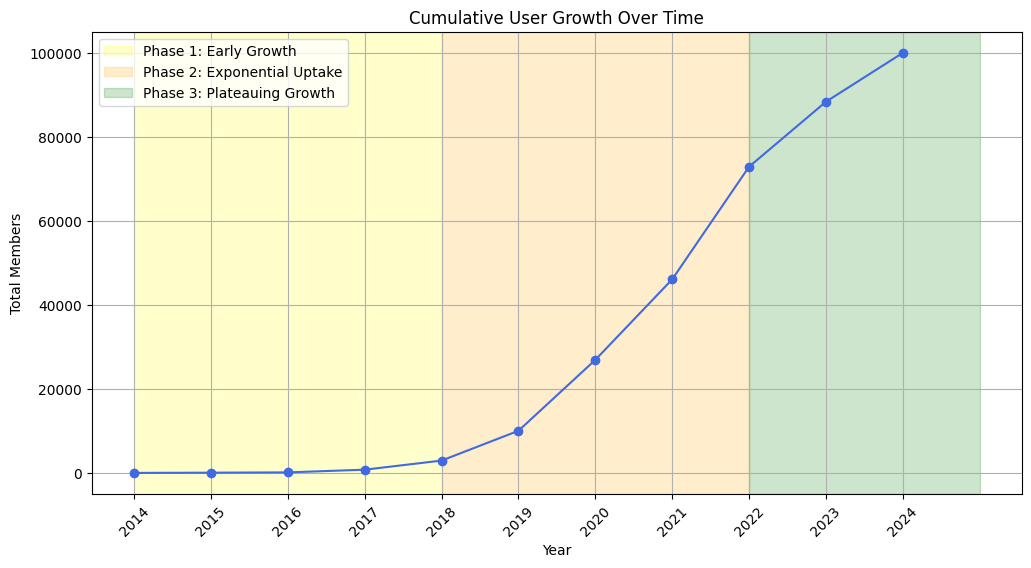

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(
    cumulative_growth.index, 
    cumulative_growth.values, 
    marker="o", 
    linestyle="-", 
    color="royalblue"
)

plt.axvspan(2014, 2018, color='yellow', alpha=0.2, label='Phase 1: Early Growth')
plt.axvspan(2018, 2022, color='orange', alpha=0.2, label='Phase 2: Exponential Uptake')
plt.axvspan(2022, 2025, color='green', alpha=0.2, label='Phase 3: Plateauing Growth')

plt.xlabel("Year")
plt.ylabel("Total Members")
plt.title("Cumulative User Growth Over Time")
plt.grid(True)
plt.xticks(cumulative_growth.index, rotation=45)
plt.legend(loc='upper left')
plt.show()

### Trend Analysis: Growth and Recent Slowdown  
- We can divide the past few years into three phases or buckets, 2014 to 2018 as **Early Growth**, 2018 to 2022 as **Exponential Growth**, and 2023 to latest as **Matured or Plateauing Growth**
- The overall trend shows **strong growth**, with **exponential expansion from 2017 to 2022**.  
- However, in recent years, the trend appears to be **flattening**, indicating a potential **market saturation or slower adoption rate**.  


Cumulative view does not provide a deep dive into absolute member growth, let us plot absolute new members per year, and also plot the YoY increase in new members in the next part.



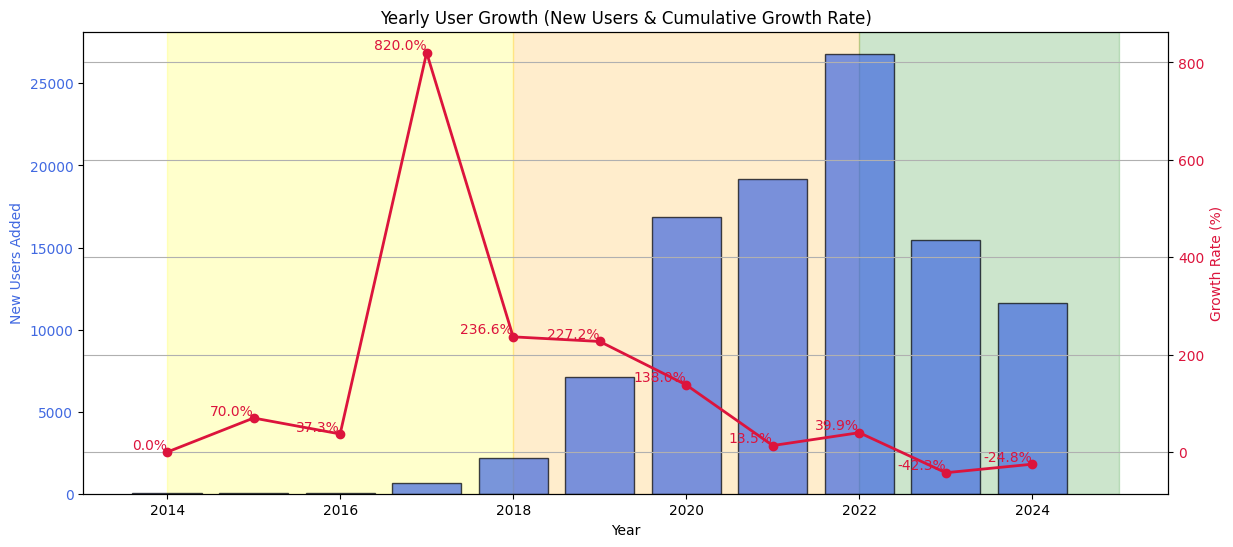

In [84]:
# Compute Year-over-Year growth rate
pct_growth_rate = yearly_growth.pct_change() * 100
pct_growth_rate = pct_growth_rate.fillna(0)

# Create a dual-axis chart
fig, ax1 = plt.subplots(figsize=(14, 6))

plt.axvspan(2014, 2018, color='yellow', alpha=0.2, label='Phase 1: Early Growth')
plt.axvspan(2018, 2022, color='orange', alpha=0.2, label='Phase 2: Exponential Uptake')
plt.axvspan(2022, 2025, color='green', alpha=0.2, label='Phase 3: Plateauing Growth')

# Bar chart for absolute new users added each year
ax1.bar(yearly_growth.index, yearly_growth.values, color="royalblue", edgecolor="black", alpha=0.7)
ax1.set_xlabel("Year")
ax1.set_ylabel("New Users Added", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Line chart for cumulative YoY growth rate
ax2 = ax1.twinx()
ax2.plot(pct_growth_rate.index, pct_growth_rate.values, marker="o", color="crimson", linewidth=2)
ax2.set_ylabel("Growth Rate (%)", color="crimson")
ax2.tick_params(axis="y", labelcolor="crimson")

for i, txt in enumerate(pct_growth_rate.values):
    ax2.text(pct_growth_rate.index[i], pct_growth_rate.values[i], 
             f"{txt:.1f}%", fontsize=10, color="crimson", ha="right", va="bottom")

plt.title("Yearly User Growth (New Users & Cumulative Growth Rate)")
plt.grid()
plt.show()

$$
\text{Year-on-year Growth } = \frac{\text{This Year} - \text{Last Year}}{\text{Last Year}} \times 100\
$$


$$
\text{New Users Added} = \text{Total Users This Year} - \text{Total Users Last Year}
$$

### Fetch Rewards User Growth Trends  

- **Peak user acquisition occurred in 2022**, with the highest number of new users added in a single year. This suggests that several factors like **marketing efforts, brand partnerships, and external factors** (e.g., post-pandemic digital adoption) significantly drove sign-ups.  
- **Year-over-year growth rate (%) has been declining**, indicating a **natural slowdown as Fetch scales**. This aligns with typical platform growth, where **initial rapid adoption stabilizes into steady expansion**.  
- **Recent years show a decline in new user acquisition**, suggesting **market saturation, changing user behavior, or increased competition** from other rewards platforms. This could impact Fetch's ability to sustain high-growth levels and may require **new engagement strategies**.  


### Monthly new user growth for 2024

C:\Users\sana7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



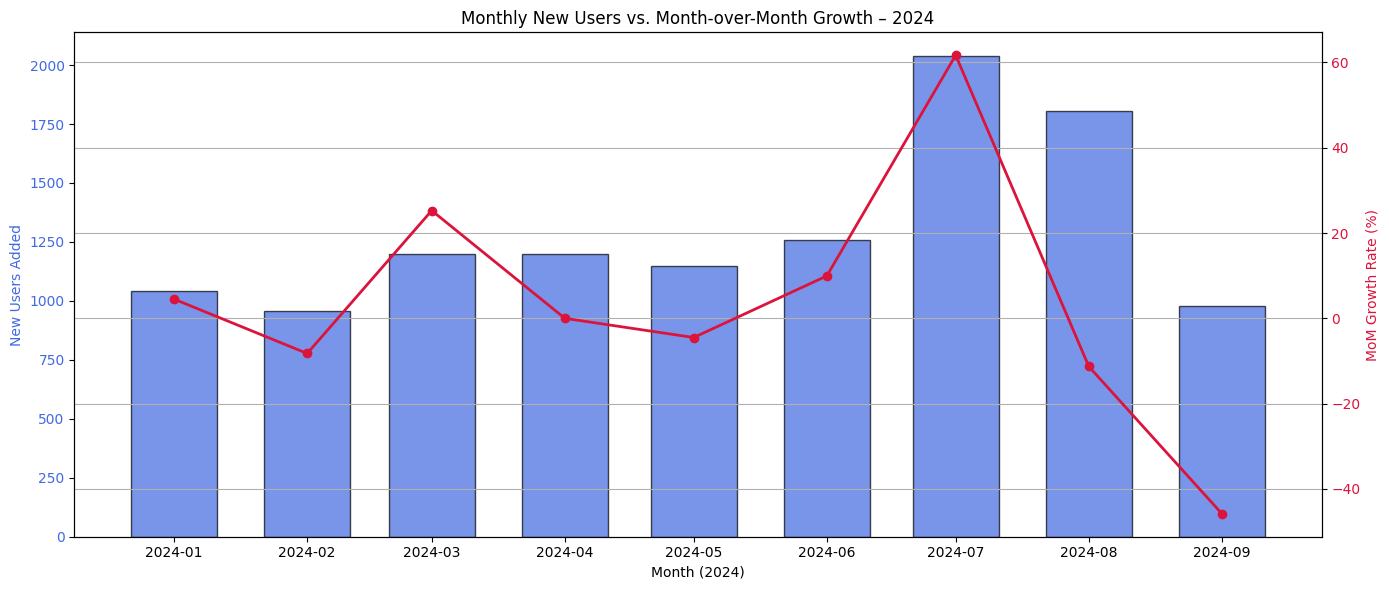

In [73]:
user["CREATED_MONTH"] = user["CREATED_DATE"].dt.to_period("M")
monthly_counts = user.groupby("CREATED_MONTH").size().rename("MonthlyNewUsers")
monthly_df = monthly_counts.to_frame()
#    MoM growth = ((ThisMonth - LastMonth) / LastMonth) * 100
monthly_df["MoMGrowthRate"] = monthly_df["MonthlyNewUsers"].pct_change() * 100

monthly_df_2024 = monthly_df.loc[monthly_df.index.year == 2024]

fig, ax1 = plt.subplots(figsize=(14, 6))

x_values = monthly_df_2024.index.to_timestamp()

# Left axis: monthly new-user counts (bars)
ax1.bar(
    x_values,
    monthly_df_2024["MonthlyNewUsers"],
    width=20,              
    color="royalblue",
    edgecolor="black",
    alpha=0.7
)
ax1.set_xlabel("Month (2024)")
ax1.set_ylabel("New Users Added", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Right axis: month-over-month growth (line)
ax2 = ax1.twinx()
ax2.plot(
    x_values,
    monthly_df_2024["MoMGrowthRate"],
    marker="o",
    color="crimson",
    linewidth=2
)
ax2.set_ylabel("MoM Growth Rate (%)", color="crimson")
ax2.tick_params(axis="y", labelcolor="crimson")

plt.title("Monthly New Users vs. Month-over-Month Growth – 2024")
plt.grid(True)
plt.tight_layout()
plt.show()

### Insight: Monthly User Growth in 2024 

- **Second‐Half Spike:** New user signups climb steadily in the middle of the year and then jump significantly around late Q3 (where both absolute users and MoM growth peak), indicating a strong uptick in acquisitions during that period. 
- **Rapid Drop‐Off:** After that peak, the growth rate plunges into negative territory and the absolute new‐user count also falls sharply—suggesting a sudden slowdown or possible seasonality in user signups at the end of the year. 


Note: We must disregard the 2024-09 month since the data is not completed for this month. 

## Calculating Average Order Value (AOV) per Store

We compute the **Average Order Value (AOV)** to understand the **average revenue per store and per transaction**:  

- **Total Revenue** → Sum of all **FINAL_SALE** values.  
- **Total Unique Receipts** → Count of unique **RECEIPT_IDs**.  
- **AOV Calculation** → `Total Revenue / Total Unique Receipts`.  

This metric helps assess **customer spending behavior** and **transaction value per order**.  


In [78]:
# Calculate Total AOV for each store
store_revenue = df.groupby("STORE_NAME")["FINAL_SALE"].sum()
store_orders = df.groupby("STORE_NAME")["RECEIPT_ID"].nunique()

# Compute AOV per store
store_aov = (store_revenue / store_orders).reset_index()
store_aov["NUMBER_OF_ORDERS"] = store_orders.values  # Add number of orders as a new column
store_aov.columns = ["STORE_NAME", "AOV", "NUMBER_OF_ORDERS"]

# Filter out stores with fewer than 10 receipts as they wouldnt be significant for this type of analysis
store_aov_filtered = store_aov[store_aov["NUMBER_OF_ORDERS"] > 10]

# Show the resulting DataFrame
store_aov_filtered = store_aov_filtered.sort_values(by="AOV", ascending=False)
store_aov_filtered

,STORE_NAME,AOV,NUMBER_OF_ORDERS
893,ULTA BEAUTY,15.710769,13
28,AMAZON,14.734451,164
178,COSTCO,13.318627,510
90,BJ'S WHOLESALE CLUB,11.882774,155
721,SAM'S CLUB,11.150516,504
...,...,...,...
137,CASEY'S GENERAL STORE,2.334615,13
826,SUPERMERCADOS ECONO,2.240909,11
287,FIVE BELOW,2.145088,57
703,ROSES,2.053636,11


## Top 10 Stores by Average Order Value (AOV)  

We analyze the **top 10 stores with the highest AOV** to understand where users spend the most per transaction.  


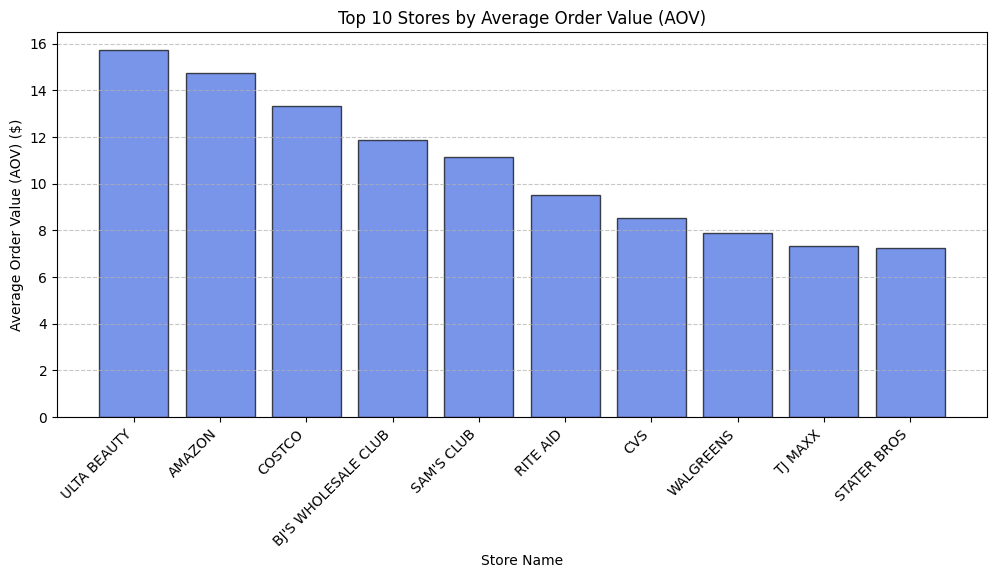

In [75]:
# Plot the Average Order Value (AOV) per store
store_aov_filtered = store_aov_filtered.head(10)
plt.figure(figsize=(12, 5))
plt.bar(store_aov_filtered["STORE_NAME"], store_aov_filtered["AOV"], color="royalblue", edgecolor="black", alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Store Name")
plt.ylabel("Average Order Value (AOV) ($)")
plt.title("Top 10 Stores by Average Order Value (AOV)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Insight: Top 3 Stores with Highest Average Order Value (AOV)  

- The **top 3 stores with >10 receipts - Ulta Beauty, Amazon and Costco are with the highest AOV** indicate where users are making **higher-value purchases per transaction**.  
- **Higher AOV suggests premium product offerings, larger basket sizes, or stronger brand partnerships** at these stores.  
- The platform could explore **exclusive promotions, deeper retailer engagement, or expanded reward incentives** with these high-AOV stores to drive more spending.  

### *Assumption*  : We have assumed that those stores with <=10 receipts are with low n-sizes and difficult to judge for such an insight

## Top 10 Stores by Total Sales  

We analyze the **top 10 stores generating the highest revenue** based on total **FINAL_SALE** values.  

- This helps identify **where users are spending the most**.  
- Stores with the highest revenue may have **stronger brand partnerships, higher transaction volumes, or premium product offerings**.  
- Understanding sales distribution across stores can help optimize **marketing strategies and retailer collaborations**.  

The bar chart visualizes the **top-performing stores** based on total revenue.  


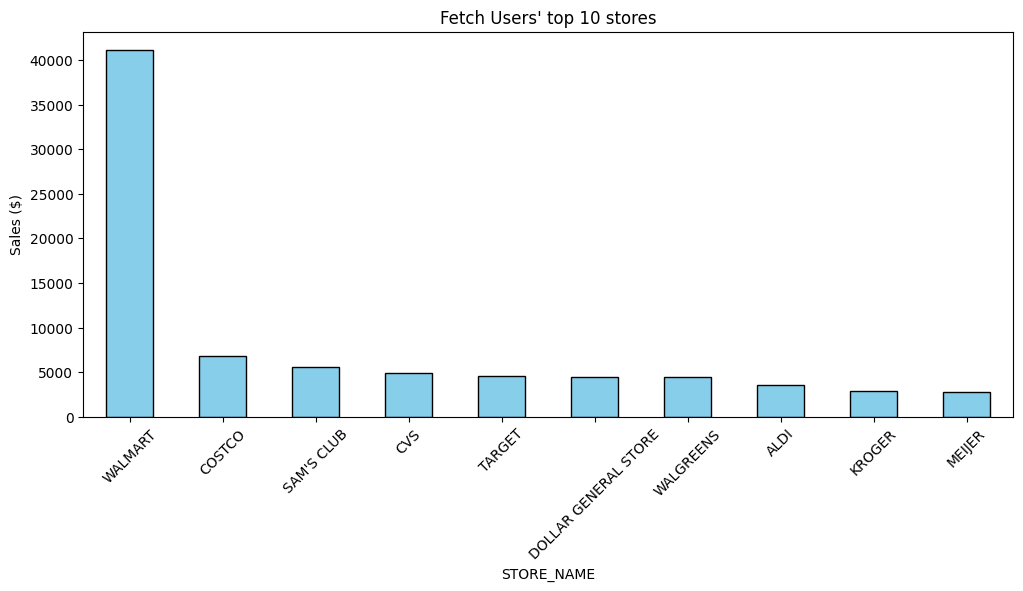

In [70]:
revenue_per_store = df.groupby("STORE_NAME")["FINAL_SALE"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
revenue_per_store.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel("Sales ($)")
plt.title("Fetch Users' top 10 stores")
plt.show()


### Insight: Walmart's Dominance in Sales & Skewed User Spending  

- **Walmart dominates sales**: Users make the highest purchases at Walmart ( around $ 41k in total sales in the given time period), indicating **strong brand preference and loyalty**.  
- **Highly Skewed User Sales**: Most stores contribute only a fraction of Walmart’s sales, suggesting **uneven user engagement** across retailers. Expanding engagement across a wider store base should be a priority.  
- **Potential for Expansion**: Stores ranked **2nd–10th have relatively similar sales levels**, presenting opportunities for **growth and deeper partnerships**.  
- **Retailer Partnerships Drive Behavior**: Walmart’s dominance suggests **successful retailer collaborations impact user spending**—exploring similar partnerships with other major chains could **increase overall sales**.  


## Distribution of Products per Receipt  

We analyze the **number of products purchased per receipt** to understand shopping behavior and basket sizes.  

- **Grouping by `RECEIPT_ID`** helps count how many products are bought in each transaction.  
- **Displaying the frequency of different basket sizes** helps identify trends in user purchasing habits.  
- This analysis is useful for **understanding cart size patterns and optimizing promotions** to encourage larger purchases.  

The bar chart below visualizes the **distribution of products per receipt**.  


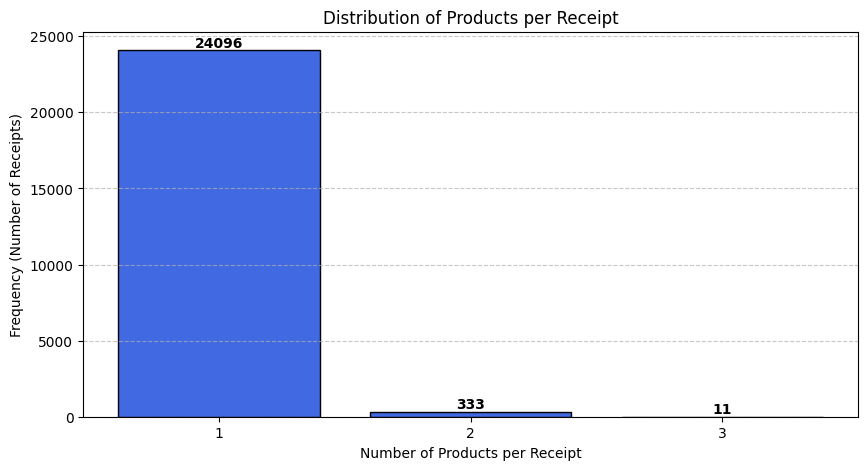

In [71]:
# Group by RECEIPT_ID to count number of products per receipt
products_per_receipt = df.groupby("RECEIPT_ID")["RECEIPT_ID"].count()

# Count frequency of different basket sizes
basket_size_counts = products_per_receipt.value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(basket_size_counts.index, basket_size_counts.values, color="royalblue", edgecolor="black")

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),  
        str(bar.get_height()),  
        ha="center",  
        va="bottom",  
        fontsize=10, 
        fontweight="bold" 
    )

plt.xlabel("Number of Products per Receipt")
plt.ylabel("Frequency (Number of Receipts)")
plt.title("Distribution of Products per Receipt")
plt.xticks(basket_size_counts.index) 
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Insight: Users Mostly Purchase Single Items  

- The majority of receipts show that **only 1 product is purchased per transaction**.  
- **333 transactions** had **2 products**, and **only 11 transactions** included **3 products**.  
- This suggests that users **are not frequently making bulk purchases** through the platform.  
- Encouraging **multi-item purchases** through **bundling, promotions, or rewards incentives** could increase overall transaction value.  


## Visualization: Sales Trend Over Time  

We analyze the **daily sales trend** to understand how Fetch users' spending patterns change over time.  

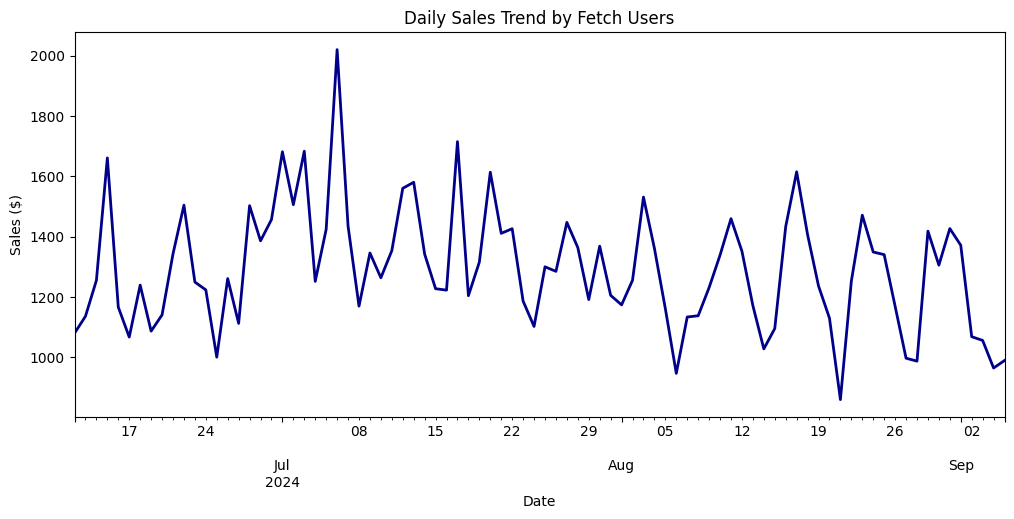

In [72]:
# Visualization: Sales Trend Over Time

# Aggregate sales per purchase date
sales_per_date = df.groupby("PURCHASE_DATE")["FINAL_SALE"].sum()
plt.figure(figsize=(12, 5))

sales_per_date[:-3].plot(color="darkblue", linewidth=2)
plt.title("Daily Sales Trend by Fetch Users")
plt.ylabel("Sales ($)")
plt.xlabel("Date")
plt.show()

### Insight: Sales Volatility and Spikes  

- **Sales are highly volatile**, with daily revenue fluctuating significantly. This suggests **periods of high and low user engagement**, possibly influenced by **promotion cycles, seasonal demand, or shopping trends**.  
- **Clear sales spike on July 1st**, indicating a surge in engagement, potentially driven by:  
  - **Marketing promotions or sponsored offers**.  
  - **Seasonal events or holidays impacting purchase behavior**.  

Understanding these patterns can help optimize **campaign timing and promotional strategies**.  
